In [1]:
pip install data


Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

# Custom DataSet
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris_data = load_iris()


# Now you have the training and testing datasets in X_train, X_test, y_train, and y_test


In [3]:
class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [4]:
model = IrisNet(4, 100, 50, 3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


In [5]:
batch_size = 60
iris_data_file =  load_iris

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)


# How many instances have we got?
print('# instances in training set: ', len(X_train))
print('# instances in testing/validation set: ', len(X_test))

# Create the dataloaders - for training and validation/testing
# We will be using the term validation and testing data interchangably
train_loader = torch.utils.data.DataLoader(dataset=X_train, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=X_test, batch_size=batch_size, shuffle=True)

# instances in training set:  120
# instances in testing/validation set:  30


In [9]:
# Our model
net = IrisNet(4, 100, 50, 3)

# Out loss function
criterion = nn.CrossEntropyLoss()

# Our optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0) 

In [28]:
num_epochs = 500

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
        
    
    for i, data in enumerate(train_loader):
       # for i, data in enumerate(train_loader):
            print(data)
    items, classes = data  # Unpack the data tuple
                     
         # Convert torch tensor to Variable
    items = items.float()  # Convert to float type
    classes = classes.long()  # Convert to long type
        
    net.train()           # Put the network into training mode
        
    optimizer.zero_grad() # Clear off the gradients from any past operation
    outputs = net(items)  # Do the forward pass
    loss = criterion(outputs, classes) # Calculate the loss
    loss.backward()       # Calculate the gradients with help of back propagation
    optimizer.step()      # Ask the optimizer to adjust the parameters based on the gradients
        
        # Record the correct predictions for training data
    train_total += classes.size(0)
    _, predicted = torch.max(outputs, 1)
    train_correct += (predicted == classes).sum().item()  # Use .item() to get a scalar value

    print('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' % (epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

net.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
train_loss.append(loss.item())  # Use .item() to get a scalar value

    # What was our train accuracy?
train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
test_classes = torch.LongTensor(test_ds.data.values[:, 4])

outputs = net(test_items)
loss = criterion(outputs, test_classes)
test_loss.append(loss.item())  # Use .item() to get a scalar value
_, predicted = torch.max(outputs, 1)
total = test_classes.size(0)
correct = (predicted == test_classes).sum().item()  # Use .item() to get a scalar value
test_accuracy.append((100 * correct / total))


tensor([[6.4000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [5.4000, 3.4000, 1.7000, 0

ValueError: too many values to unpack (expected 2)

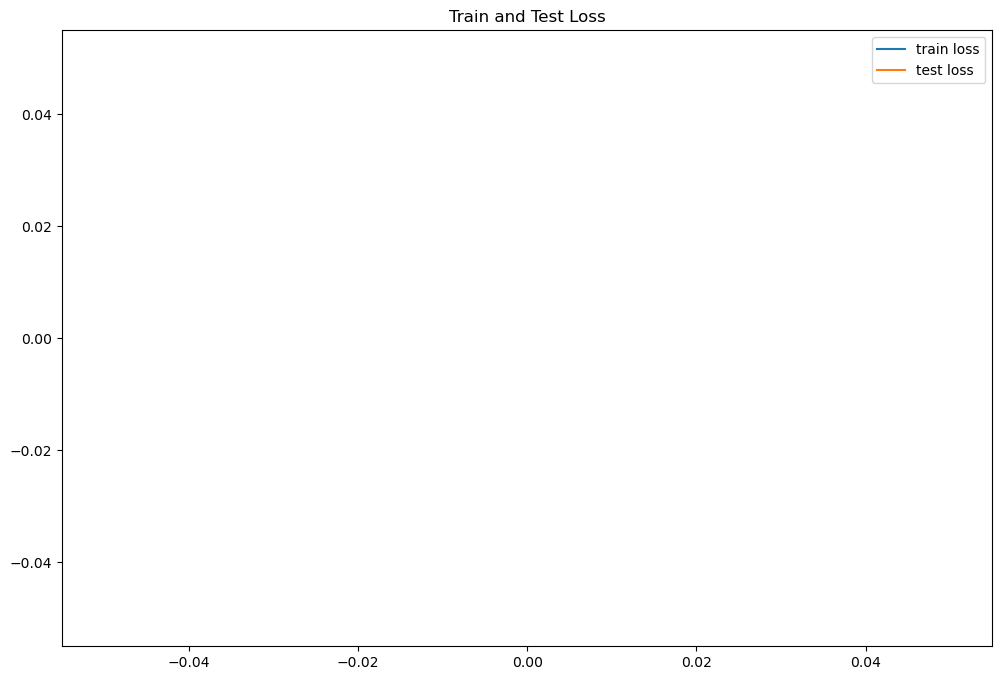

In [29]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()